<a href="https://colab.research.google.com/github/AZEINMU1911/ML_Thesis/blob/main/Soybeans_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
column_names = ['P_Yield','Yield','Prcp_Avg','Temp_m1','Temp_m2','Temp_m3','Temp_m4','Temp_m5','Rhm_m1','Rhm_m2','Rhm_m3','Rhm_m4','Rhm_m5','ToaDR_m1','ToaDR_m2','ToaDR_m3','ToaDR_m4','ToaDR_m5']
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Skripsi/Dataset.csv', index_col ='Year', parse_dates = True)
dataset = df.copy()
df.head

<bound method NDFrame.head of             P_Yield   Yield  Prcp_Avg  Temp_m1  Temp_m2  Temp_m3  Temp_m4  \
Year                                                                        
1982-01-01   140742   65140      1.60    26.23    25.93    25.98    26.60   
1983-01-01    65140   99640      2.90    26.96    26.03    25.83    25.87   
1984-01-01    99640  139891      3.44    26.11    25.79    25.10    25.12   
1985-01-01   139891  140087      5.14    25.99    26.15    25.12    24.88   
1986-01-01   140087  179104      4.09    25.91    26.01    25.57    24.80   
1987-01-01   179104  135967      2.16    26.64    26.12    26.38    26.29   
1988-01-01   135967  165855      2.80    26.58    26.72    25.62    25.82   
1989-01-01   165855  199478      3.75    26.23    26.12    25.48    25.52   
1990-01-01   199478  237306      3.11    26.96    27.14    26.96    26.41   
1991-01-01   237306  205224      1.37    26.12    25.96    26.26    27.01   
1992-01-01   205224  297580      3.41    26.29

In [ ]:
df.dtypes

P_Yield       int64
Yield         int64
Prcp_Avg    float64
Temp_m1     float64
Temp_m2     float64
Temp_m3     float64
Temp_m4     float64
Temp_m5     float64
Rhm_m1      float64
Rhm_m2      float64
Rhm_m3      float64
Rhm_m4      float64
Rhm_m5      float64
ToaDR_m1    float64
ToaDR_m2    float64
ToaDR_m3    float64
ToaDR_m4    float64
ToaDR_m5    float64
dtype: object

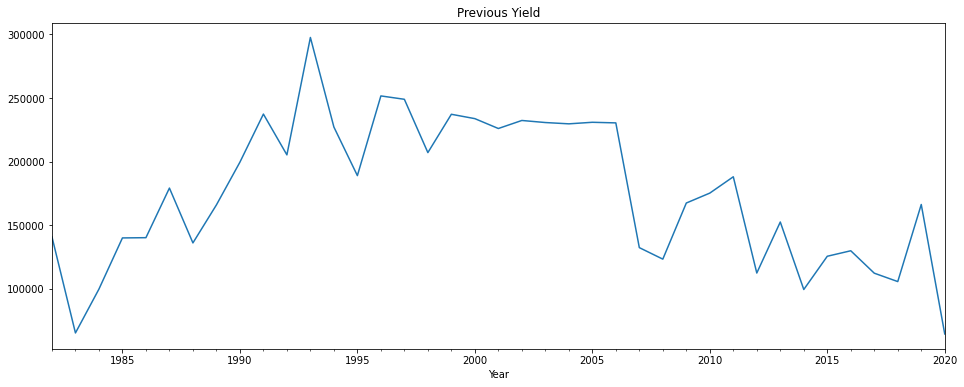

In [ ]:
P_yield_graph = df["P_Yield"].plot(figsize=(16, 6)).set_title('Previous Yield')

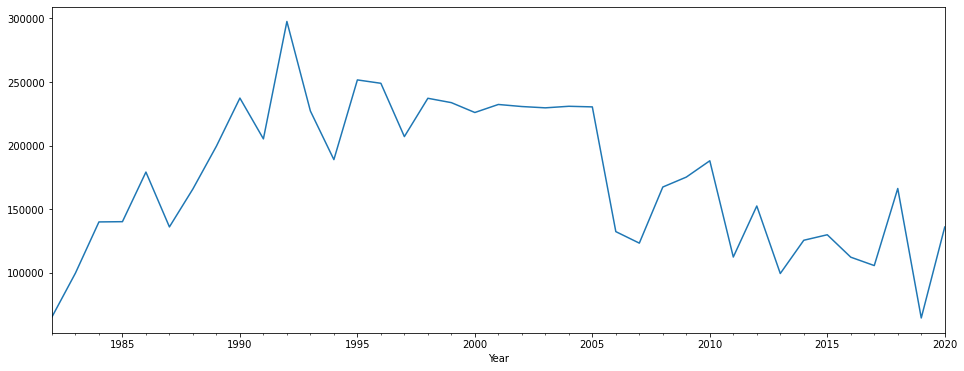

In [ ]:
Yield_graph = df["Yield"].plot(figsize=(16, 6))

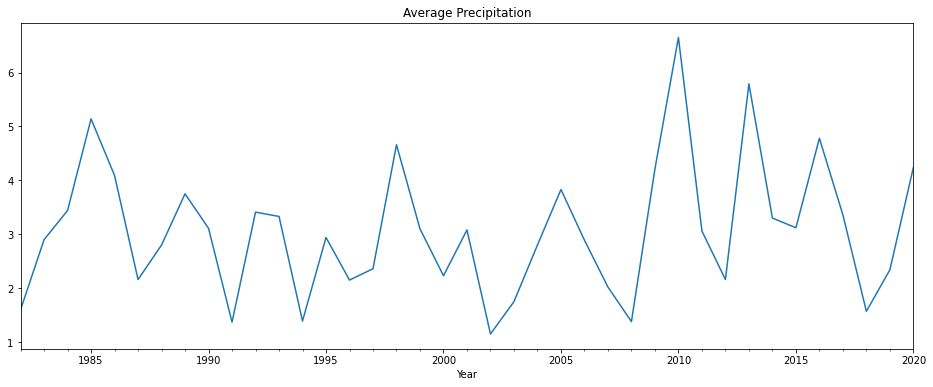

In [ ]:
Prcp_Avg_graph = df["Prcp_Avg"].plot(figsize=(16, 6)).set_title('Average Precipitation')

Text(0.5, 1.0, 'Temperature Graph')

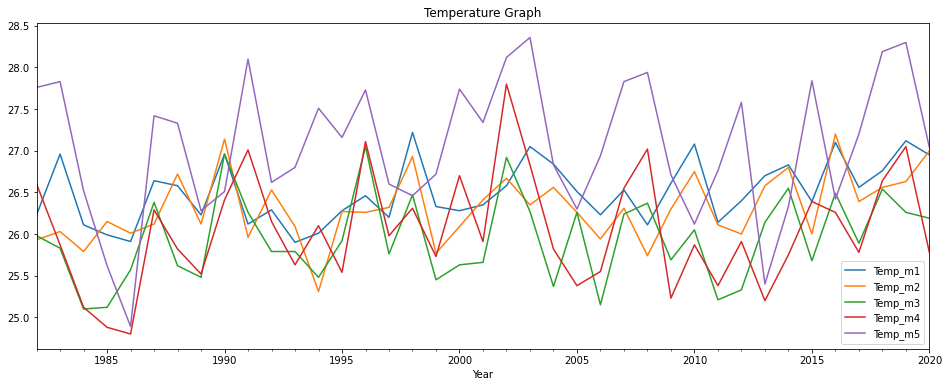

In [ ]:
df.iloc[:, [3,4,5,6,7]].plot(figsize=(16, 6)).set_title('Temperature Graph')

Text(0.5, 1.0, 'Humidity')

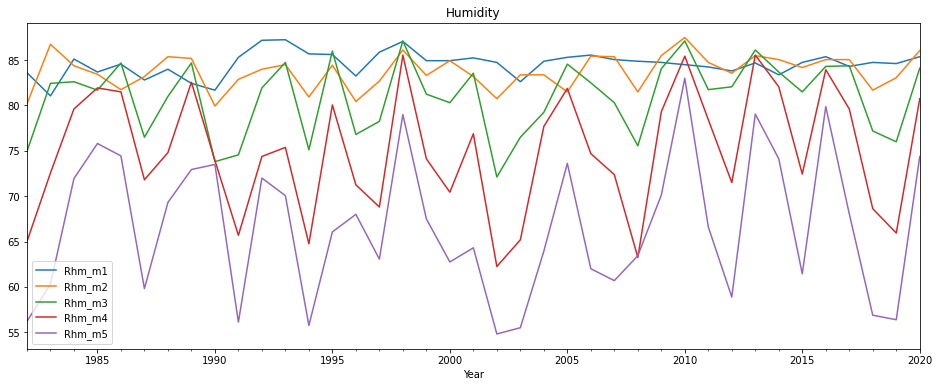

In [ ]:
df.iloc[:, [8,9,10,11,12]].plot(figsize=(16, 6)).set_title("Humidity")

Text(0.5, 1.0, 'Radiation Exposure')

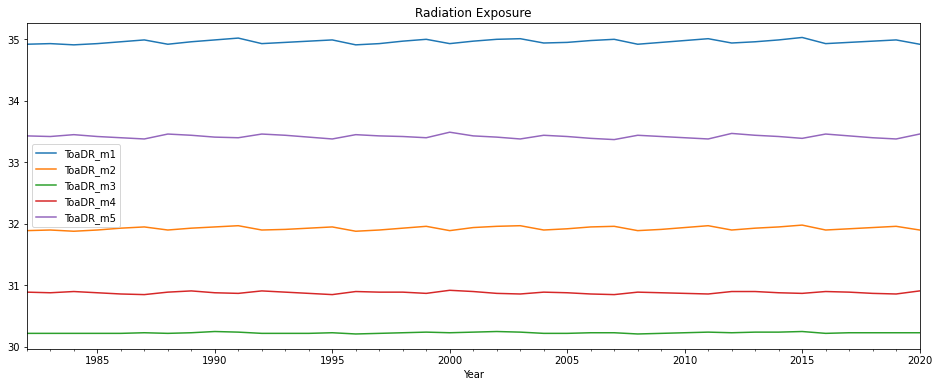

In [ ]:
df.iloc[:, [13,14,15,16,17]].plot(figsize=(16, 6)).set_title("Radiation Exposure")

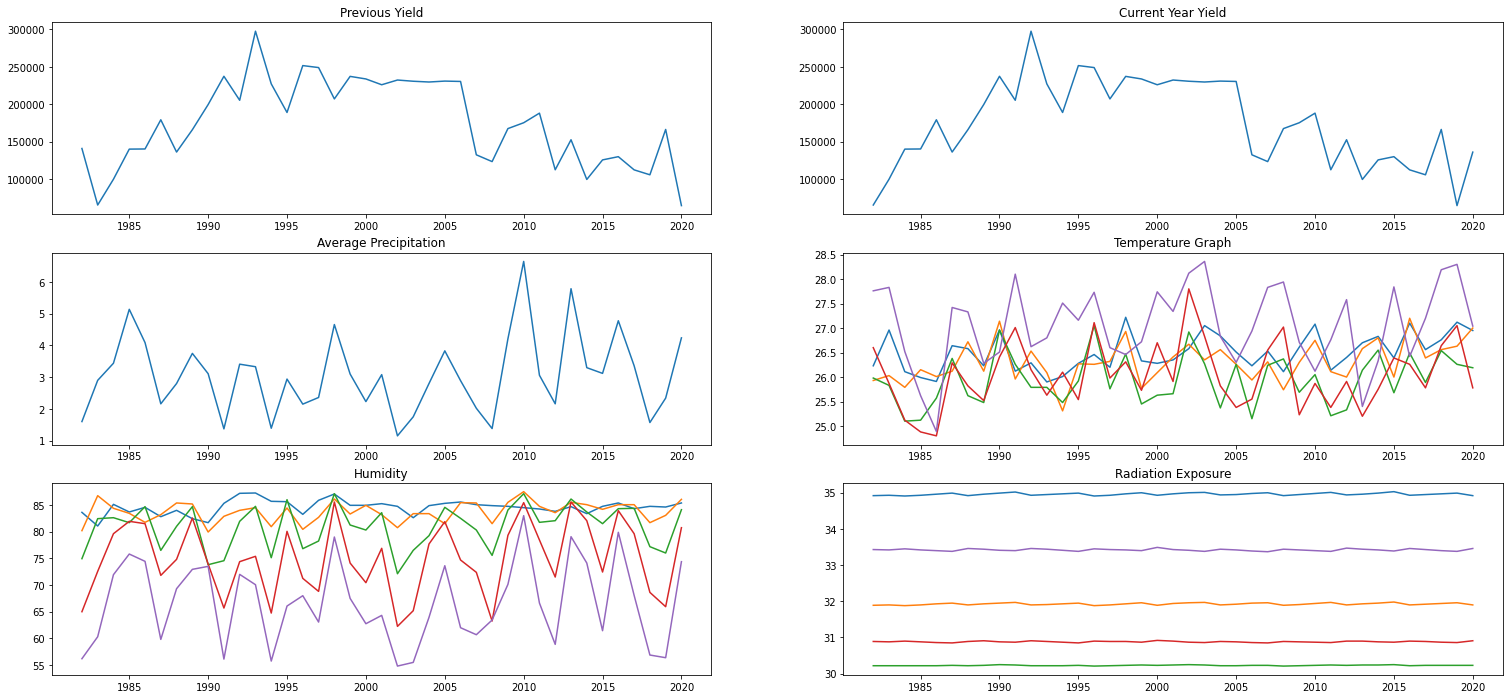

In [ ]:
plt.figure(1,figsize=(26, 12))
plt.subplot(321).set_title('Previous Yield')
plt.plot(df["P_Yield"])
plt.subplot(322).set_title('Current Year Yield')
plt.plot(df[["Yield"]])
plt.subplot(323).set_title('Average Precipitation')
plt.plot(df[["Prcp_Avg"]])
plt.subplot(324).set_title('Temperature Graph')
plt.plot(df.iloc[:, [3,4,5,6,7]])
plt.subplot(325).set_title("Humidity")
plt.plot(df.iloc[:, [8,9,10,11,12]])
plt.subplot(326).set_title("Radiation Exposure")
plt.plot(df.iloc[:, [13,14,15,16,17]])

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,P_Yield,Yield,Prcp_Avg,Temp_m1,Temp_m2,Temp_m3,Temp_m4,Temp_m5,Rhm_m1,Rhm_m2,Rhm_m3,Rhm_m4,Rhm_m5,ToaDR_m1,ToaDR_m2,ToaDR_m3,ToaDR_m4,ToaDR_m5
P_Yield,1.000000,0.678191,-0.190758,-0.244023,-0.140702,0.034859,0.202638,0.036072,0.355353,-0.308856,-0.215942,-0.219458,-0.144925,0.228767,0.178336,0.068568,-0.074752,-0.099353
Yield,0.678191,1.000000,-0.080718,-0.132862,0.049647,0.126398,0.129091,-0.055263,0.302943,-0.239256,-0.034319,-0.033725,0.092154,0.031100,-0.019348,0.007768,0.160910,0.146603
Prcp_Avg,-0.190758,-0.080718,1.000000,0.250243,0.405061,-0.166632,-0.645867,-0.797725,0.110622,0.579746,0.793431,0.895847,0.899953,-0.146038,-0.122592,-0.033180,0.216380,0.144222
Temp_m1,-0.244023,-0.132862,0.250243,1.000000,0.754854,0.536860,0.277334,0.128679,-0.256015,0.300719,0.068739,0.186550,0.179135,0.123023,0.150121,0.241495,-0.023901,-0.076024
Temp_m2,-0.140702,0.049647,0.405061,0.754854,1.000000,0.541144,0.130954,-0.178732,-0.011788,0.233740,0.185491,0.388786,0.464463,-0.005077,0.041611,0.247165,0.179253,0.133439
Temp_m3,0.034859,0.126398,-0.166632,0.536860,0.541144,1.000000,0.657148,0.281515,-0.158727,-0.320914,-0.356705,-0.204109,-0.005136,0.153296,0.162136,0.183487,-0.079511,-0.109531
Temp_m4,0.202638,0.129091,-0.645867,0.277334,0.130954,0.657148,1.000000,0.785398,-0.060465,-0.405698,-0.727729,-0.743092,-0.573971,0.210715,0.184690,0.203174,-0.065845,-0.076331
Temp_m5,0.036072,-0.055263,-0.797725,0.128679,-0.178732,0.281515,0.785398,1.000000,-0.126858,-0.235880,-0.633914,-0.808465,-0.835373,0.195664,0.176194,0.128386,-0.174696,-0.152871
Rhm_m1,0.355353,0.302943,0.110622,-0.256015,-0.011788,-0.158727,-0.060465,-0.126858,1.000000,0.112705,0.270898,0.107160,0.139618,-0.051448,-0.069701,-0.170252,0.120404,0.130818
Rhm_m2,-0.308856,-0.239256,0.579746,0.300719,0.233740,-0.320914,-0.405698,-0.235880,0.112705,1.000000,0.736023,0.588077,0.424804,-0.001038,0.007356,0.043165,0.116101,0.086184


In [ ]:
X = dataset[['P_Yield','Prcp_Avg','Temp_m1','Temp_m2','Temp_m3','Temp_m4','Temp_m5','Rhm_m1','Rhm_m2','Rhm_m3','Rhm_m4','Rhm_m5','ToaDR_m1','ToaDR_m2','ToaDR_m3','ToaDR_m4','ToaDR_m5']]
Y = dataset['Yield']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state=10)
print (X_train.shape,X_test.shape)

(29, 17) (10, 17)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [ ]:
# before scaling the min and max

X_train.describe()

,P_Yield,Prcp_Avg,Temp_m1,Temp_m2,Temp_m3,Temp_m4,Temp_m5,Rhm_m1,Rhm_m2,Rhm_m3,Rhm_m4,Rhm_m5,ToaDR_m1,ToaDR_m2,ToaDR_m3,ToaDR_m4,ToaDR_m5
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.00000,29.000000
mean,180412.586207,3.044828,26.555517,26.381034,26.044483,26.102069,27.071034,84.646552,83.677586,80.701724,74.584483,66.773103,34.962759,31.928621,30.228966,30.88069,33.418276
std,60356.161470,1.283309,0.373531,0.367592,0.497519,0.694393,0.861184,1.397038,2.086243,4.292037,6.907836,7.856149,0.032392,0.027995,0.010805,0.01602,0.025364
min,64334.000000,1.150000,25.900000,25.740000,25.150000,24.800000,24.890000,81.060000,79.940000,72.120000,62.250000,54.810000,34.910000,31.880000,30.210000,30.85000,33.370000
25%,135967.000000,2.150000,26.230000,26.090000,25.690000,25.730000,26.600000,84.250000,81.750000,76.810000,68.810000,60.690000,34.930000,31.900000,30.220000,30.87000,33.400000
50%,187992.000000,3.060000,26.560000,26.350000,26.050000,25.870000,26.940000,84.750000,83.380000,81.750000,74.690000,67.500000,34.960000,31.930000,30.230000,30.88000,33.420000
75%,230658.000000,3.410000,26.840000,26.630000,26.270000,26.600000,27.830000,85.310000,85.380000,84.120000,79.620000,73.500000,34.990000,31.950000,30.240000,30.89000,33.440000
max,297580.000000,6.650000,27.220000,27.140000,27.050000,27.800000,28.360000,87.250000,87.500000,87.120000,85.560000,83.000000,35.020000,31.970000,30.250000,30.91000,33.460000


In [ ]:
# after scaling the min and max values for the alcohol and malic acid will be 0 and 1 resp.

X_train_scaled.describe()

,P_Yield,Prcp_Avg,Temp_m1,Temp_m2,Temp_m3,Temp_m4,Temp_m5,Rhm_m1,Rhm_m2,Rhm_m3,Rhm_m4,Rhm_m5,ToaDR_m1,ToaDR_m2,ToaDR_m3,ToaDR_m4,ToaDR_m5
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,0.497666,0.344514,0.496604,0.457882,0.470780,0.434023,0.628540,0.579411,0.494390,0.572115,0.529150,0.424374,0.479624,0.540230,0.474138,0.511494,0.536398
std,0.258766,0.233329,0.282978,0.262566,0.261852,0.231464,0.248180,0.225693,0.275958,0.286136,0.296346,0.278686,0.294475,0.311060,0.270126,0.267005,0.281826
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.307114,0.181818,0.250000,0.250000,0.284211,0.310000,0.492795,0.515347,0.239418,0.312667,0.281424,0.208585,0.181818,0.222222,0.250000,0.333333,0.333333
50%,0.530161,0.347273,0.500000,0.435714,0.473684,0.356667,0.590778,0.596123,0.455026,0.642000,0.533677,0.450160,0.454545,0.555556,0.500000,0.500000,0.555556
75%,0.713084,0.410909,0.712121,0.635714,0.589474,0.600000,0.847262,0.686591,0.719577,0.800000,0.745174,0.663001,0.727273,0.777778,0.750000,0.666667,0.777778
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train_scaled

,P_Yield,Prcp_Avg,Temp_m1,Temp_m2,Temp_m3,Temp_m4,Temp_m5,Rhm_m1,Rhm_m2,Rhm_m3,Rhm_m4,Rhm_m5,ToaDR_m1,ToaDR_m2,ToaDR_m3,ToaDR_m4,ToaDR_m5
0,0.802856,0.181818,0.424242,0.371429,1.000000,0.770000,0.818444,0.353796,0.066138,0.312667,0.386100,0.467896,0.000000,0.000000,0.00,0.833333,0.888889
1,0.003456,0.318182,0.803030,0.207143,0.357895,0.356667,0.847262,0.000000,0.900794,0.688000,0.442299,0.195105,0.181818,0.222222,0.25,0.500000,0.555556
2,0.711909,0.316364,0.250000,0.142857,0.000000,0.250000,0.590778,0.726979,0.727513,0.692000,0.533677,0.255055,0.636364,0.777778,0.50,0.166667,0.222222
3,0.720051,0.000000,0.515152,0.664286,0.931579,1.000000,0.930836,0.596123,0.107143,0.000000,0.000000,0.000000,0.818182,0.888889,1.00,0.333333,0.444444
4,0.713946,0.487273,0.462121,0.371429,0.584211,0.193333,0.406340,0.686591,0.206349,0.829333,0.842128,0.667258,0.363636,0.444444,0.25,0.500000,0.555556
5,0.307114,0.300000,0.515152,0.700000,0.247368,0.340000,0.703170,0.474960,0.719577,0.592000,0.538825,0.514367,0.090909,0.222222,0.25,0.666667,1.000000
6,1.000000,0.396364,0.000000,0.250000,0.336842,0.276667,0.550432,1.000000,0.603175,0.842000,0.563278,0.540972,0.363636,0.333333,0.25,0.666667,0.777778
7,0.436711,0.216364,0.924242,0.635714,0.584211,0.750000,0.982709,0.575121,0.412698,0.258667,0.158301,0.055694,0.727273,0.888889,0.50,0.166667,0.111111
8,0.713084,0.109091,0.871212,0.435714,0.589474,0.676667,1.000000,0.252019,0.455026,0.292000,0.126126,0.024477,0.909091,1.000000,0.75,0.166667,0.111111
9,0.377636,0.843636,0.606061,0.600000,0.521053,0.133333,0.146974,0.586430,0.735450,0.933333,1.000000,0.860234,0.454545,0.555556,0.75,0.833333,0.777778


In [ ]:
scaler_Y = MinMaxScaler()

Y_train_scaled = scaler_Y.fit_transform(Y_train.values.reshape(-1,1))
Y_test_scaled = scaler_Y.transform(Y_test.values.reshape(-1,1))

In [ ]:
# convert the numpy array after transform into a dataframe

Y_train_scaled = pd.DataFrame(Y_train_scaled, index = Y_train.index)
Y_test_scaled = pd.DataFrame(Y_test_scaled, index = Y_test.index)

In [ ]:
Y_train

Year
1996-01-01    248946
1983-01-01     99640
2006-01-01    132261
2002-01-01    230658
2005-01-01    230384
1988-01-01    165855
1993-01-01    227134
2019-01-01     64334
2003-01-01    229636
2013-01-01     99318
2001-01-01    232283
1986-01-01    179104
2004-01-01    230859
2009-01-01    175156
1992-01-01    297580
2017-01-01    105553
2020-01-01    135874
1990-01-01    237306
2008-01-01    167345
1999-01-01    233725
2014-01-01    125467
1998-01-01    237156
2011-01-01    112273
2007-01-01    123209
2010-01-01    187992
1982-01-01     65140
1997-01-01    207019
2018-01-01    166195
1991-01-01    205224
Name: Yield, dtype: int64

In [ ]:
Y_train_scaled

,0
Year,
1996-01-01,0.791491
1983-01-01,0.151368
2006-01-01,0.291225
2002-01-01,0.713084
2005-01-01,0.711909
1988-01-01,0.435253
1993-01-01,0.697976
2019-01-01,0.000000
2003-01-01,0.708702


In [ ]:
print(type(Y_train))
print(type(Y_train_scaled))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train = X_train_scaled.sort_index()
Y_train = Y_train_scaled.sort_index()
X_test = X_test_scaled.sort_index()
Y_test = Y_test_scaled.sort_index()

In [ ]:
X_train

,P_Yield,Prcp_Avg,Temp_m1,Temp_m2,Temp_m3,Temp_m4,Temp_m5,Rhm_m1,Rhm_m2,Rhm_m3,Rhm_m4,Rhm_m5,ToaDR_m1,ToaDR_m2,ToaDR_m3,ToaDR_m4,ToaDR_m5
0,0.802856,0.181818,0.424242,0.371429,1.000000,0.770000,0.818444,0.353796,0.066138,0.312667,0.386100,0.467896,0.000000,0.000000,0.00,0.833333,0.888889
1,0.003456,0.318182,0.803030,0.207143,0.357895,0.356667,0.847262,0.000000,0.900794,0.688000,0.442299,0.195105,0.181818,0.222222,0.25,0.500000,0.555556
2,0.711909,0.316364,0.250000,0.142857,0.000000,0.250000,0.590778,0.726979,0.727513,0.692000,0.533677,0.255055,0.636364,0.777778,0.50,0.166667,0.222222
3,0.720051,0.000000,0.515152,0.664286,0.931579,1.000000,0.930836,0.596123,0.107143,0.000000,0.000000,0.000000,0.818182,0.888889,1.00,0.333333,0.444444
4,0.713946,0.487273,0.462121,0.371429,0.584211,0.193333,0.406340,0.686591,0.206349,0.829333,0.842128,0.667258,0.363636,0.444444,0.25,0.500000,0.555556
5,0.307114,0.300000,0.515152,0.700000,0.247368,0.340000,0.703170,0.474960,0.719577,0.592000,0.538825,0.514367,0.090909,0.222222,0.25,0.666667,1.000000
6,1.000000,0.396364,0.000000,0.250000,0.336842,0.276667,0.550432,1.000000,0.603175,0.842000,0.563278,0.540972,0.363636,0.333333,0.25,0.666667,0.777778
7,0.436711,0.216364,0.924242,0.635714,0.584211,0.750000,0.982709,0.575121,0.412698,0.258667,0.158301,0.055694,0.727273,0.888889,0.50,0.166667,0.111111
8,0.713084,0.109091,0.871212,0.435714,0.589474,0.676667,1.000000,0.252019,0.455026,0.292000,0.126126,0.024477,0.909091,1.000000,0.75,0.166667,0.111111
9,0.377636,0.843636,0.606061,0.600000,0.521053,0.133333,0.146974,0.586430,0.735450,0.933333,1.000000,0.860234,0.454545,0.555556,0.75,0.833333,0.777778


In [ ]:
model = LinearRegression(fit_intercept = True, normalize = False, copy_X = True, n_jobs=1)
model.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(n_jobs=1, normalize=False)

In [ ]:
r_sq = model.score(X_train,Y_train)
print ("Coefficient of determination: ", r_sq)
print ('Intercept: ', model.intercept_)
print (' Slope: ', model.coef_)

Coefficient of determination:  0.7053433482205802
Intercept:  [-0.20623082]
 Slope:  [[ 0.13629655  0.41302852  0.42599571  0.47153258 -0.16576304 -0.87259028
  -0.1073942   0.11779237 -0.64990182  1.34553773 -1.40021089 -0.4574341
   1.11006501  0.23223172 -0.54280576 -0.32128326  1.41867227]]


In [ ]:
Y_pred_train = model.predict(X_train)
Y_pred_train = pd.DataFrame(Y_pred_train, index = Y_train.index)

In [ ]:
Y_pred_test = model.predict(X_test)
Y_pred_test = pd.DataFrame(Y_pred_test, index = Y_test.index)

In [ ]:
Y_pred_test

,0
Year,
1984-01-01,0.584085
1985-01-01,0.689212
1987-01-01,0.105507
1989-01-01,0.537650
1994-01-01,0.334220
1995-01-01,0.050074
2000-01-01,1.127356
2012-01-01,0.090788
2015-01-01,0.516243


In [ ]:
print('true value:', Y_test, sep='\n')
print('\r')
print('predicted response:', Y_pred_test, sep='\n')

true value:
                   0
Year                
1984-01-01  0.323937
1985-01-01  0.324777
1987-01-01  0.307114
1989-01-01  0.579405
1994-01-01  0.534067
1995-01-01  0.802856
2000-01-01  0.692972
2012-01-01  0.377636
2015-01-01  0.280648
2016-01-01  0.205032

predicted response:
                   0
Year                
1984-01-01  0.584085
1985-01-01  0.689212
1987-01-01  0.105507
1989-01-01  0.537650
1994-01-01  0.334220
1995-01-01  0.050074
2000-01-01  1.127356
2012-01-01  0.090788
2015-01-01  0.516243
2016-01-01  0.762476


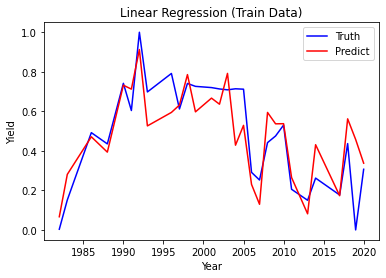

In [ ]:

plt.plot(Y_train, color = 'blue', label='Truth')
plt.plot(Y_pred_train, color = 'red', label='Predict')
plt.legend()
plt.title('Linear Regression (Train Data)')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()

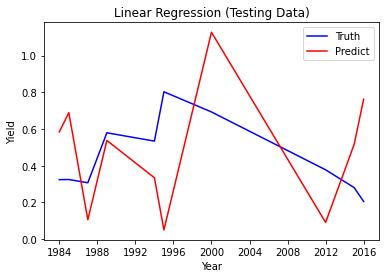

In [ ]:

plt.plot(Y_test, color = 'blue', label='Truth')
plt.plot(Y_pred_test, color = 'red', label='Predict')
plt.legend()
plt.title('Linear Regression (Testing Data)')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()

In [ ]:
print('Train Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('\n')
print('Test Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))

Train Mean Squared Error: 0.0196227670368388
Train Root Mean Squared Error: 0.14008128724722227


Test Mean Squared Error: 0.14867186313581532
Test Root Mean Squared Error: 0.38557990499482114


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


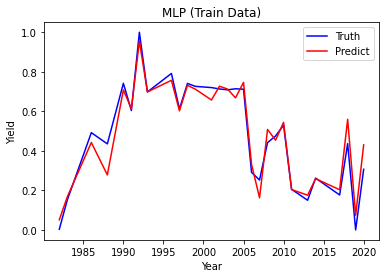

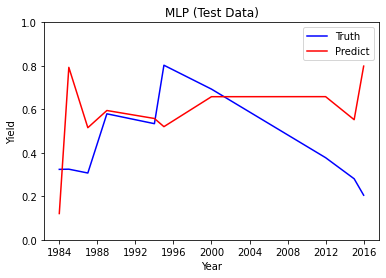

Total epoch: 2103


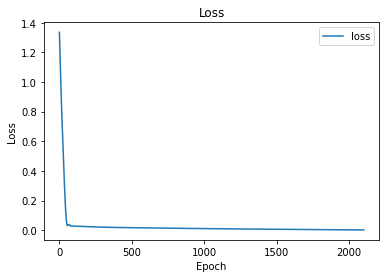

Train Mean Squared Error: 0.003236314310402834
Train Root Mean Squared Error: 0.056888613187551285


Test Mean Squared Error: 0.08908363039761547
Test Root Mean Squared Error: 0.29846880975675744


In [ ]:
from ast import Yield
#MLP
model = MLPRegressor(hidden_layer_sizes= (8,6,4), activation = 'relu', solver = 'adam', learning_rate = 'constant', learning_rate_init = 0.00250, max_iter = 3000,
                     n_iter_no_change = 2000 )
model.fit(X_train,Y_train)
#Training
Y_pred_train = model.predict(X_train)
Y_pred_train = pd.DataFrame(Y_pred_train, index = Y_train.index)
plt.plot(Y_train, color = 'blue', label='Truth')
plt.plot(Y_pred_train, color = 'red', label='Predict')
plt.legend()
plt.title('MLP (Train Data)')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.show()
#Testing
Y_pred_test = model.predict(X_test)
Y_pred_test = pd.DataFrame(Y_pred_test, index = Y_test.index)
plt.plot(Y_test, color = 'blue', label='Truth')
plt.plot(Y_pred_test, color = 'red', label='Predict')
plt.legend()
plt.title('MLP (Test Data)')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.yticks(np.arange(0, 1.1, step=0.2))
plt.show()
#Evaluation
print("Total epoch:", model.n_iter_)
plt.plot(model.loss_curve_, label='loss')
plt.legend()
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
print('Train Mean Squared Error:', metrics.mean_squared_error(Y_train, Y_pred_train))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_train, Y_pred_train)))
print('\n')
print('Test Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_test))
print('Test Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_test)))